### Import necessary modules

In [53]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

### Plot decision boundary

In [54]:
def plot_decision_boundary(X, y, model):
    # Create 2 dimensional arrays spanning the entire horizontal and vertical range
    # of our data.
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1, 50)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1, 50)
    
    # meshgrid = return coordinate matrices from the input of the coordinate vectors.
    xx, yy = np.meshgrid(x_span, y_span)
    # meshgrid returns a 2 dimensional array, so we use ravel to make it into a
    # one dimensional matrix.
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    
    # model.predict() -> tests all the points from the grid
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

### Adam Optimizer:
An adaptive learning rate method algorithm. it is a combination of 2 other extensions of SGD(Stochastic Gradient Descent), notably adagrad and rmsprop. 

What distinguishes from the vanilla Gradient Descent is on vanilla GD, we have to careful choosing our learning rate:
1. Learning rate too small means the model will converge too slow
2. Learning rate too big means it would "overfit"

Adam optimizers can adapt the learning rate as the model converges.

### Initiate random points of 2 regions.

(1000, 1)
(1000, 2)


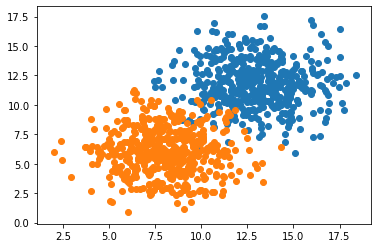

In [55]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
# y = 0 corresponds to the top region (Xa)
# y = 1 corresponds to the bottom region (Xb)
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

print(y.shape)
print(X.shape)

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

### Sequential class
A sequential model is a linear stack of layers.
Neural networks are organized in layers containing interconnected nodes.

In the previously discussed perceptron, the first layer is actually an input layer which are the linear systems of weights and biases and the output layer is a predicted output via the activation function (sigmoid) node.

### Dense layers
in a dense layer, every node in the layer is connected to the node in the preceding layer.

In [56]:
model = Sequential()
# units = 1 since we'll only have one output node producing a single output.
# input_shape = 2 since we only have 2 inputs nodes, x1 and x2
# activation = 'sigmoid'
model.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))

adam = Adam(lr = 0.1)

# binary_crossentropy since we're only dealing with 2 classification problrmd.
# use categorical_crossentropy for multi class classifications.
model.compile(adam, loss = 'binary_crossentropy', metrics=['accuracy'])

### Start training our model using model.fit()

x = X -> Training data we used
y = y -> Labels assigned to each data points.
verbose = progress bar of the information of the training of our model.

careful choosing batch_size, not too big (note: larger batch size can result in a significant degradation in tthe quality of the model.
batch_size = 50 with 1000 data points means it takes 20 iterations to take 1 epoch.

epoch:
- too small can result in underfiting
- too big can result in overfitting. (not much of a big deal in smaller neural networks.)
epochs depends on the datasets.

shuffle = shuffle training data before the next epoch to prevent it getting stuck in a local minimum, instead of going to the global minimum.

In [57]:
h = model.fit(x = X, y = y, verbose = 1, batch_size = 50, epochs = 100, shuffle = 'true')

Epoch 1/100
1000/1000 [==============================] - 0s 250us/step - loss: 2.9636 - accuracy: 0.4610
Epoch 2/100
1000/1000 [==============================] - 0s 22us/step - loss: 0.7392 - accuracy: 0.5740
Epoch 3/100
1000/1000 [==============================] - 0s 21us/step - loss: 0.4595 - accuracy: 0.8190
Epoch 4/100
1000/1000 [==============================] - 0s 22us/step - loss: 0.3854 - accuracy: 0.8920
Epoch 5/100
1000/1000 [==============================] - 0s 21us/step - loss: 0.3427 - accuracy: 0.9000
Epoch 6/100
1000/1000 [==============================] - 0s 22us/step - loss: 0.3121 - accuracy: 0.9220
Epoch 7/100
1000/1000 [==============================] - 0s 21us/step - loss: 0.2957 - accuracy: 0.9330
Epoch 8/100
1000/1000 [==============================] - 0s 21us/step - loss: 0.2695 - accuracy: 0.9470
Epoch 9/100
1000/1000 [==============================] - 0s 22us/step - loss: 0.2488 - accuracy: 0.9490
Epoch 10/100
1000/1000 [==============================] - 0s 23

### Plot the Accuracy and Losses

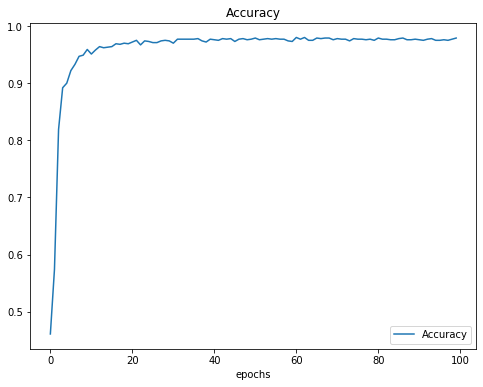

In [58]:
plt.figure(figsize = (8,6))
plt.plot(h.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.legend(['Accuracy'])

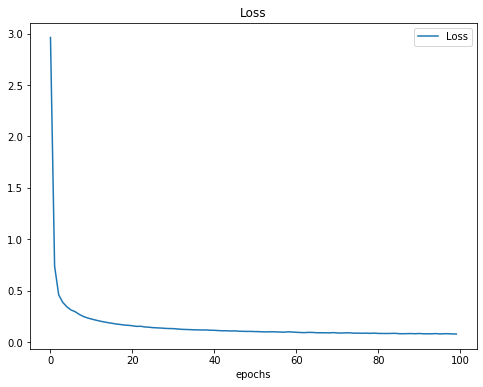

In [59]:
plt.figure(figsize = (8,6))
plt.plot(h.history['loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.legend(['Loss'])

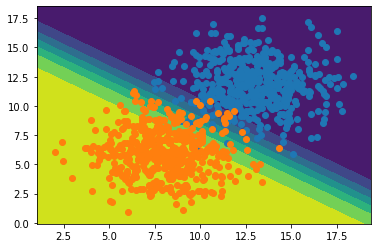

In [61]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
# x = 7.5
# y = 5
 
 
# point = np.array([[x, y]])
# prediction = model.predict(point)
# plt.plot([x], [y], marker='o', markersize=10, color="red")
# print("prediction is: ",prediction)